In [1]:
import torch
from PIL import Image
import numpy as np
import torchvision
import torchvision.transforms as T
from torchvision.transforms import ToTensor, Normalize , Compose
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset, DataLoader


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# data_set = np.memmap(r'F:\Video_set\All_data_set.npy',mode='r',shape=(8991,100,100,3))
# x_np = torch.from_numpy(data_set)
# x_np.shape

In [4]:
data_set = np.load(r'F:\Video_set\All_data_set.npy',mmap_mode="r")
#data_set = np.load(r'F:\Video_set\Acid\Video200.npy')
#data_set = data_set.memmap.astype(float)
x_np = torch.from_numpy(data_set)
x_np.shape

C:\Users\ACER\AppData\Local\Temp\ipykernel_8488\3831074355.py:4: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_numpy.cpp:178.)
  x_np = torch.from_numpy(data_set)


torch.Size([539460, 100, 100, 3])

In [5]:
x_np.shape
x_np.type()

'torch.ByteTensor'

In [6]:
x_np[0]

tensor([[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [133, 153,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        

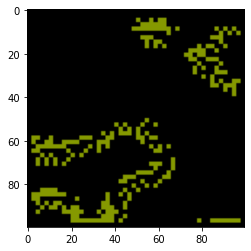

In [7]:
#x_np = x_np.permute(0,3,2,1)
a = x_np.numpy()
img = a
img.shape
plt.imshow(img[0])

In [8]:

image_size = 100
batch_size = 60
stats = 1/255

In [9]:
x_np[0].type()

'torch.ByteTensor'

In [10]:
#x_np = x_np.memmap.astype(float)

In [11]:
# x_np = x_np.float()
# x_np = x_np/255
# x_np.shape

In [12]:
x_np = x_np.permute(0,3,1,2)
x_np.shape

torch.Size([539460, 3, 100, 100])

In [13]:
x_np[0]

tensor([[[  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         ...,
         [  0,   0,   0,  ..., 133,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0]],

        [[  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         ...,
         [  0,   0,   0,  ..., 153,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0]],

        [[  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         ...,
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0]]], dtype=torch.uint8)

In [14]:
x_np.shape

torch.Size([539460, 3, 100, 100])

In [15]:
x_data_set = DataLoader(x_np,batch_size)

In [16]:
x_data_set

In [17]:
import torch
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
def denorm(img_tensors):
    out = img_tensors
    return out.clamp(0,1)

In [19]:
def show_images(images, nmax=60):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images.detach()[:nmax], nrow=10).permute(1,2,0))

def show_batch(dl, nmax=60):
    for images in dl:
        show_images(images, nmax)
        print(images.shape)
        break

torch.Size([60, 3, 100, 100])


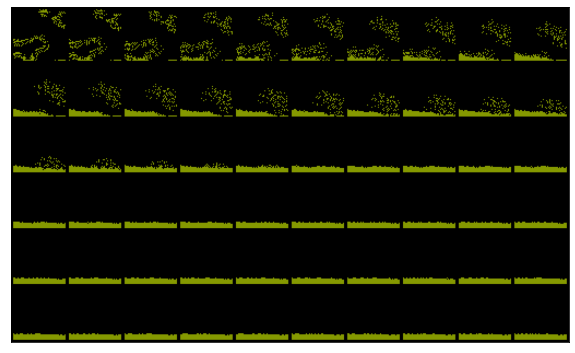

In [20]:
show_batch(x_data_set)


In [21]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [22]:
device = get_default_device()
device

device(type='cuda')

In [23]:
x_data_set = DeviceDataLoader(x_data_set, device)


In [24]:
import torch.nn as nn



In [25]:
discriminator = nn.Sequential(
    # in: 3 x 64 x 64
    #in: 3 x 100 x 100 
    nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 64 x 32 x 32
    # out 64x 50 x 50
    nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 128 x 16 x 16
    # 128 x 25 x 25
    nn.Conv2d(128, 256, kernel_size=4, stride=5, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 256 x 8 x 8

    nn.Conv2d(256, 512, kernel_size=4, stride=1, padding=1, bias=False),
    nn.BatchNorm2d(512),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 512 x 4 x 4

    nn.Conv2d(512, 1, kernel_size=4, stride=1, padding=0, bias=False),
    # out: 1 x 1 x 1

    nn.Flatten(),
    nn.Sigmoid())

In [26]:
discriminator = to_device(discriminator, device)


In [27]:
latent_size = 64


torch.Size([60, 3, 100, 100])


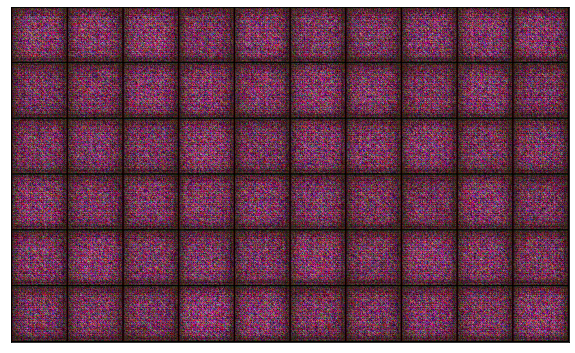

In [28]:
generator = nn.Sequential(
    # in: latent_size x 1 x 1

    nn.ConvTranspose2d(latent_size, 512, kernel_size=5, stride=1, padding=0, bias=False),
    nn.BatchNorm2d(512),
    nn.ReLU(True),
    # out: 512 x 5 x 5

    nn.ConvTranspose2d(512, 256, kernel_size=5, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.ReLU(True),
    
    nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=0, bias=False),
    nn.BatchNorm2d(128),
    nn.ReLU(True),

    nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=0, bias=False),
    nn.BatchNorm2d(64),
    nn.ReLU(True),
    nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1, bias=False),
    nn.Tanh()
)
xb = torch.randn(60, latent_size, 1, 1) # random latent tensors

fake_images = generator(xb)
show_images(denorm(fake_images))
print(fake_images.shape)


In [29]:
generator = to_device(generator, device)


In [30]:
def train_discriminator(real_images, opt_d):
    # Clear discriminator gradients
    opt_d.zero_grad()
    real_images = real_images.float()
    # Pass real images through discriminator
    real_preds = discriminator(real_images)
    real_targets = torch.ones(real_images.size(0), 1, device=device)
    real_loss = F.binary_cross_entropy(real_preds, real_targets)
    real_score = torch.mean(real_preds).item()
    
    # Generate fake images
    latent = torch.randn(batch_size, latent_size, 1, 1, device=device)
    fake_images = generator(latent)

    # Pass fake images through discriminator
    fake_targets = torch.zeros(fake_images.size(0), 1, device=device)
    fake_preds = discriminator(fake_images)
    fake_loss = F.binary_cross_entropy(fake_preds, fake_targets)
    fake_score = torch.mean(fake_preds).item()

    # Update discriminator weights
    loss = real_loss + fake_loss
    loss.backward()
    opt_d.step()
    return loss.item(), real_score, fake_score

In [31]:
def train_generator(opt_g):
    # Clear generator gradients
    opt_g.zero_grad()
    
    # Generate fake images
    latent = torch.randn(batch_size, latent_size, 1, 1, device=device)
    fake_images = generator(latent)
    
    # Try to fool the discriminator
    preds = discriminator(fake_images)
    targets = torch.ones(batch_size, 1, device=device)
    loss = F.binary_cross_entropy(preds, targets)
    
    # Update generator weights
    loss.backward()
    opt_g.step()
    
    return loss.item()

In [32]:
from torchvision.utils import save_image


In [33]:
import os
sample_dir = 'generated'
os.makedirs(sample_dir, exist_ok=True)

In [34]:
def save_samples(index, latent_tensors, show=True):
    fake_images = generator(latent_tensors)
    fake_fname = 'generated-images-{0:0=4d}.png'.format(index)
    save_image(denorm(fake_images), os.path.join(sample_dir, fake_fname), nrow=6)
    print('Saving', fake_fname)
    if show:
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(fake_images.cpu().detach(), nrow=6).permute(2, 1, 0))

In [35]:
fixed_latent = torch.randn(60, latent_size, 1, 1, device=device)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Saving generated-images-0000.png


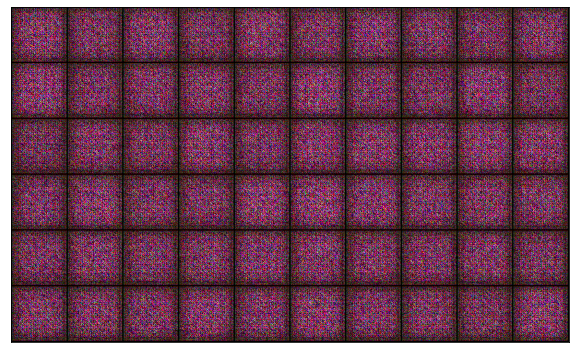

In [36]:
save_samples(0, fixed_latent)


In [37]:
from tqdm.notebook import tqdm
import torch.nn.functional as F

In [38]:
def fit(epochs, lr, start_idx=1):
    torch.cuda.empty_cache()
    
    # Losses & scores
    losses_g = []
    losses_d = []
    real_scores = []
    fake_scores = []
    
    # Create optimizers
    opt_d = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))
    opt_g = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
    
    for epoch in range(epochs):
        for real_images in tqdm(x_data_set):
            # Train discriminator
            loss_d, real_score, fake_score = train_discriminator(real_images, opt_d)
            # Train generator
            loss_g = train_generator(opt_g)
            
        # Record losses & scores
        losses_g.append(loss_g)
        losses_d.append(loss_d)
        real_scores.append(real_score)
        fake_scores.append(fake_score)
        
        # Log losses & scores (last batch)
        print("Epoch [{}/{}], loss_g: {:.4f}, loss_d: {:.4f}, real_score: {:.4f}, fake_score: {:.4f}".format(
            epoch+1, epochs, loss_g, loss_d, real_score, fake_score))
    
        # Save generated images
        save_samples(epoch+start_idx, fixed_latent, show=False)
    
    return losses_g, losses_d, real_scores, fake_scores

In [39]:
lr = 0.0001
epochs = 1

In [40]:
history = fit(epochs, lr)


  0%|          | 0/8991 [00:00<?, ?it/s]

Epoch [1/1], loss_g: 4.7853, loss_d: 0.0330, real_score: 0.9999, fake_score: 0.0323
Saving generated-images-0001.png


In [41]:
losses_g, losses_d, real_scores, fake_scores = history


In [42]:
# Save the model checkpoints 
torch.save(generator.state_dict(), 'G.pth')
torch.save(discriminator.state_dict(), 'D.pth')

In [44]:
torch.save(generator, 'G.pth')
torch.save(discriminator, 'D.pth')